In [1]:
%matplotlib inline
%reload_ext autoreload
%autoreload 2
%config InlineBackend.figure_format = 'retina'
# %qtconsole

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import xarray as xr

import logging
logging.basicConfig(level=logging.INFO)

# Sorted Spikes

In [124]:
from glob import glob
import os
from src.parameters import PROCESSED_DATA_DIR
from src.visualization import (plot_category_counts, plot_category_duration)

data_type, dim = 'sorted_spikes', '1D'
n_unique_spiking = 3

file_paths = glob(os.path.join(PROCESSED_DATA_DIR, f'*_{data_type}_{dim}_replay_info.csv'))
replay_info = pd.concat([pd.read_csv(file_path) for file_path in file_paths], axis=0)
replay_info = replay_info.loc[replay_info.n_unique_spiking >= n_unique_spiking]

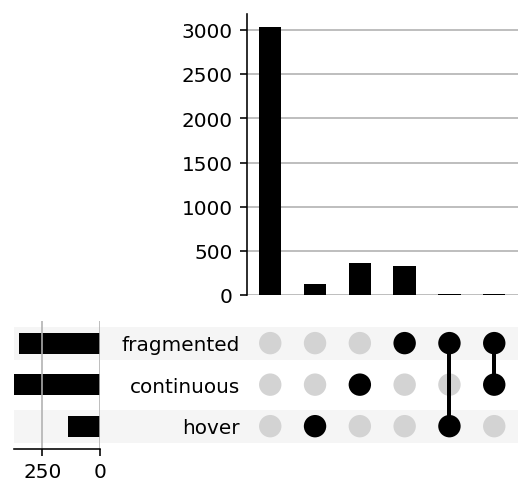

In [125]:
plot_category_counts(replay_info);

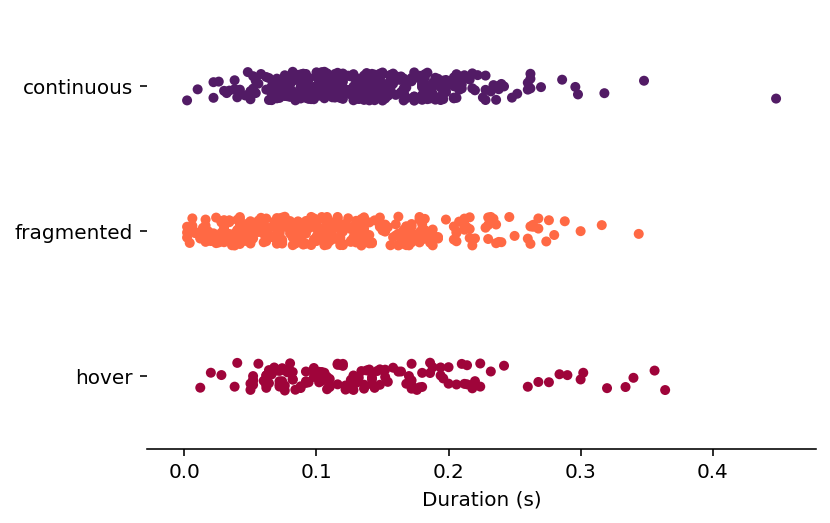

In [117]:
plt.figure()
plot_category_duration(replay_info)

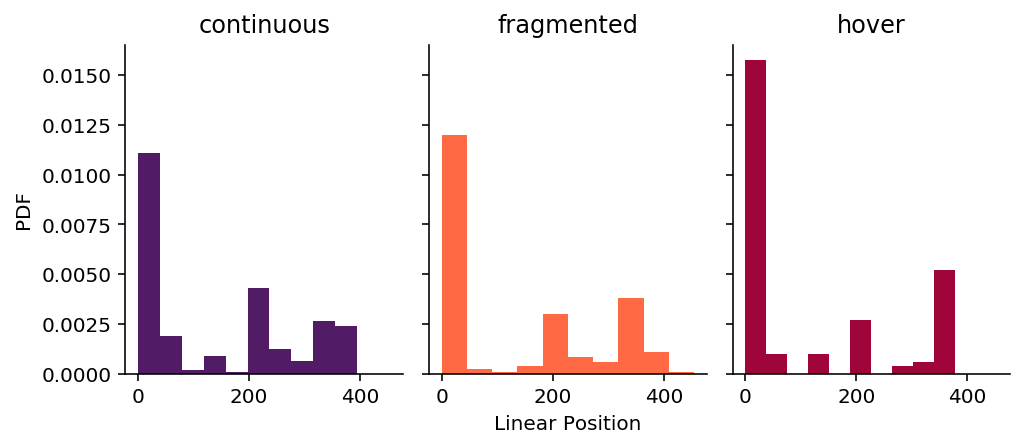

In [126]:
from src.parameters import STATE_COLORS

state_names = ['continuous', 'fragmented', 'hover']
fig, axes = plt.subplots(1, len(state_names), figsize=(7, 3),
                         sharex=True, sharey=True, constrained_layout=True)

for ax, state_name in zip(axes.flat, state_names):
    ax.hist(replay_info.loc[replay_info[state_name]].linear_position2,
            density=True, bins=10, color=STATE_COLORS[state_name])
    ax.set_title(state_name)
    
axes.flat[len(state_names) // 2].set_xlabel('Linear Position')
axes[0].set_ylabel('PDF')
sns.despine()

# Clusterless

In [119]:
data_type, dim = 'clusterless', '1D'
n_unique_spiking = 2

file_paths = glob(os.path.join(PROCESSED_DATA_DIR, f'*_{data_type}_{dim}_replay_info.csv'))
replay_info = pd.concat([pd.read_csv(file_path) for file_path in file_paths], axis=0)
replay_info = replay_info.loc[replay_info.n_unique_spiking >= n_unique_spiking]

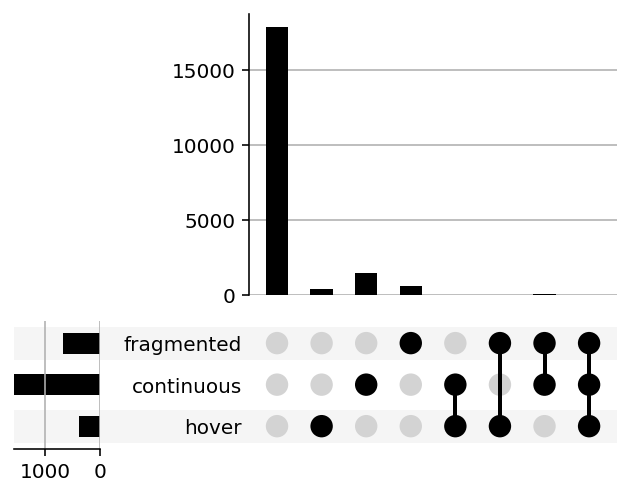

In [120]:
plot_category_counts(replay_info);

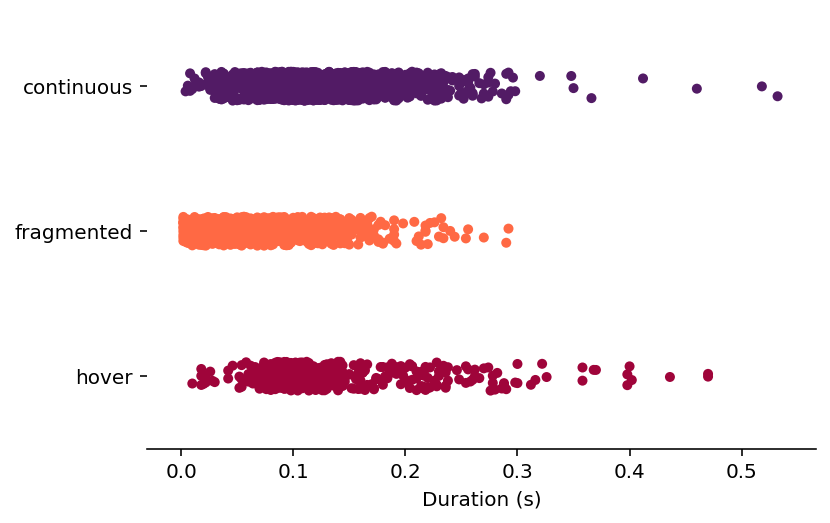

In [121]:
plt.figure()
plot_category_duration(replay_info.loc[(replay_info.n_unique_spiking >= n_unique_spiking)])

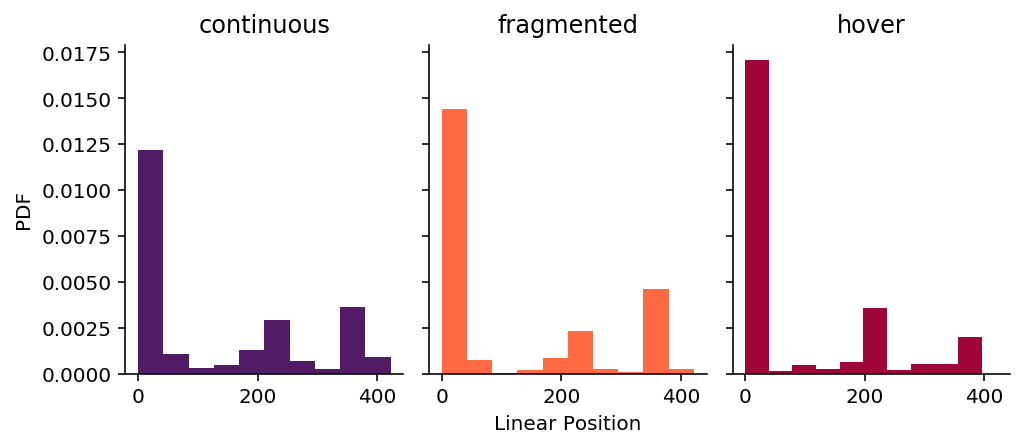

In [123]:
from src.parameters import STATE_COLORS

state_names = ['continuous', 'fragmented', 'hover']
fig, axes = plt.subplots(1, len(state_names), figsize=(7, 3),
                         sharex=True, sharey=True, constrained_layout=True)

for ax, state_name in zip(axes.flat, state_names):
    ax.hist(replay_info.loc[replay_info[state_name]].linear_position2,
            density=True, bins=10, color=STATE_COLORS[state_name])
    ax.set_title(state_name)
    
axes.flat[len(state_names) // 2].set_xlabel('Linear Position')
axes[0].set_ylabel('PDF')
sns.despine()